In [874]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
from matplotlib import pyplot as plt
#rcParams['figure.figsize'] = 6, 5  # меняем размер графиков по умолчанию
pd.set_option('display.float_format', lambda x: '%.5f' % x) # преобразоываем экспоненциальный формат чисел в десятичный
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)  # если наименования колонок длинные



In [879]:
def evaluate_preds(train_true_values, train_pred_values, val_true_values, val_pred_values):
    """
    Функция для оценки работы модели
    Parameters:
    train_true_values - целевая переменная из тренировочной части датасета
    train_pred_values - предсказания модели по тренировочной части
    val_true_values - целевая переменная из валидационной части датасета
    val_pred_values - предсказания модели по валидационной части
    Returns:
    R2 на тренировочной и валидационной части, 
    графики зависимости истинных значений от предсказаний
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(val_true_values, val_pred_values), 3)))
    
    plt.figure(figsize=(9,5))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=val_pred_values, y=val_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    plt.show()

## Исходные файлы

In [124]:
FILEPATH_TRAIN = r'C:\Users\MI\Documents\data_science\course_project\train.csv'
FILEPATH_TEST = r'C:\Users\MI\Documents\data_science\course_project\test.csv'

In [125]:
df = pd.read_csv(FILEPATH_TRAIN, delimiter = ',').set_index('Id')
df_test = pd.read_csv(FILEPATH_TEST, delimiter = ',').set_index('Id')

In [126]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.00000,10000.00000,7887.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,5202.00000,10000.00000,10000.00000,10000.00000
mean,50.40080,1.89050,56.31578,37.19964,6.27330,8.52670,12.60940,3990.16630,0.11886,24.68700,5352.15740,8.03920,1142.90446,1.31950,4.23130,214138.85740
std,43.58759,0.83951,21.05873,86.24121,28.56092,5.24115,6.77597,200500.26143,0.11903,17.53261,4006.79980,23.83187,1021.51726,1.49360,4.80634,92872.29387
min,0.00000,0.00000,1.13686,0.37062,0.00000,1.00000,0.00000,1910.00000,0.00000,0.00000,168.00000,0.00000,0.00000,0.00000,0.00000,59174.77803
25%,20.00000,1.00000,41.77488,22.76983,1.00000,4.00000,9.00000,1974.00000,0.01765,6.00000,1564.00000,0.00000,350.00000,0.00000,1.00000,153872.63394
50%,36.00000,2.00000,52.51331,32.78126,6.00000,7.00000,13.00000,1977.00000,0.07542,25.00000,5285.00000,2.00000,900.00000,1.00000,3.00000,192269.64488
75%,75.00000,2.00000,65.90063,45.12880,9.00000,12.00000,17.00000,2001.00000,0.19578,36.00000,7227.00000,5.00000,1548.00000,2.00000,6.00000,249135.46217
max,209.00000,19.00000,641.06519,7480.59213,2014.00000,42.00000,117.00000,20052011.00000,0.52187,74.00000,19083.00000,141.00000,4849.00000,6.00000,23.00000,633233.46657


**Создадим два новых поля: Цена за квадратную единицу площади и отношение общей площади к жилой

In [127]:
df['Price_sqm'] = df['Price']/df['Square']
df['Share_Life_Square'] = df['LifeSquare']/df['Square']

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.00000,50.40080,43.58759,0.00000,20.00000,36.00000,75.00000,209.00000
Rooms,10000.00000,1.89050,0.83951,0.00000,1.00000,2.00000,2.00000,19.00000
Square,10000.00000,56.31578,21.05873,1.13686,41.77488,52.51331,65.90063,641.06519
LifeSquare,7887.00000,37.19964,86.24121,0.37062,22.76983,32.78126,45.12880,7480.59213
KitchenSquare,10000.00000,6.27330,28.56092,0.00000,1.00000,6.00000,9.00000,2014.00000
Floor,10000.00000,8.52670,5.24115,1.00000,4.00000,7.00000,12.00000,42.00000
HouseFloor,10000.00000,12.60940,6.77597,0.00000,9.00000,13.00000,17.00000,117.00000
HouseYear,10000.00000,3990.16630,200500.26143,1910.00000,1974.00000,1977.00000,2001.00000,20052011.00000
Ecology_1,10000.00000,0.11886,0.11903,0.00000,0.01765,0.07542,0.19578,0.52187
Social_1,10000.00000,24.68700,17.53261,0.00000,6.00000,25.00000,36.00000,74.00000


**Посмотрим распределение стоимости квадратного (пусть будет) метра

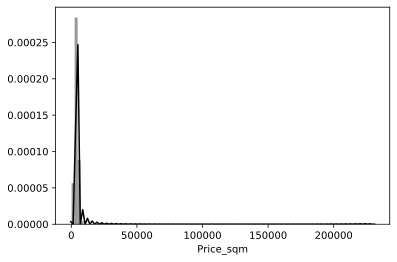

In [129]:
sns.distplot(df['Price_sqm'], color='k', bins=100, hist_kws={'alpha': 0.4});

**Явно много выбросов. Надо почистить.

In [130]:
df = df[df['Price_sqm'].isnull() |
                    (df['Price_sqm'] < df['Price_sqm'].quantile(.995)) &
                    (df['Price_sqm'] > df['Price_sqm'].quantile(.005))]


In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,9900.00000,50.13485,43.29603,0.00000,19.75000,35.00000,75.00000,209.00000
Rooms,9900.00000,1.88758,0.83911,0.00000,1.00000,2.00000,2.00000,19.00000
Square,9900.00000,56.07874,18.82660,13.78486,41.76066,52.43407,65.84417,275.64528
LifeSquare,7795.00000,37.00073,86.32316,0.37062,22.73533,32.71928,45.05167,7480.59213
KitchenSquare,9900.00000,6.26535,28.69693,0.00000,1.00000,6.00000,9.00000,2014.00000
Floor,9900.00000,8.53051,5.23413,1.00000,4.00000,7.00000,12.00000,42.00000
HouseFloor,9900.00000,12.61404,6.76724,0.00000,9.00000,13.00000,17.00000,117.00000
HouseYear,9900.00000,4010.39444,201510.34493,1910.00000,1974.00000,1977.00000,2001.00000,20052011.00000
Ecology_1,9900.00000,0.11916,0.11913,0.00000,0.01765,0.07542,0.19578,0.52187
Social_1,9900.00000,24.69212,17.54864,0.00000,6.00000,25.00000,36.00000,74.00000


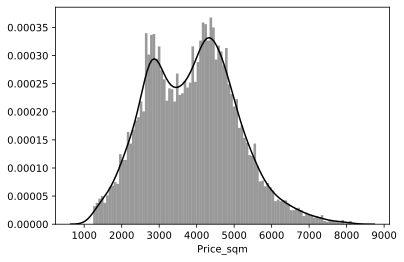

In [132]:
sns.distplot(df['Price_sqm'], color='k', bins=100, hist_kws={'alpha': 0.4});

**Мы видим двугорбое распределение, которое наталкивает нас на мысль что мы, возможно, имеем дело с двумя классами жилья, а может и нет. Надо проверить.**

**Посмотрим на матрицу корреляций

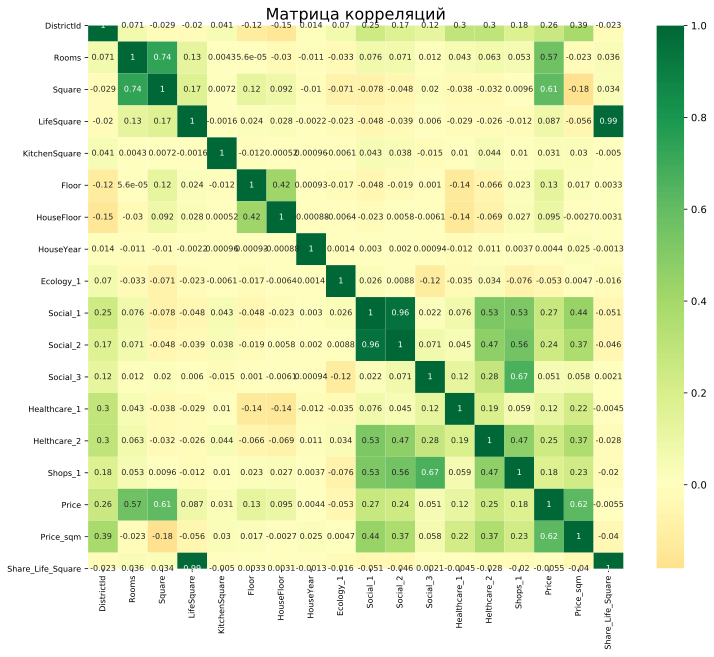

In [133]:
plt.figure(figsize=(12,10), dpi= 80)

sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True, annot_kws={"size":8})

# Decorations
plt.title('Матрица корреляций', fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


Мы видим более выраженную корреляцию между номером района и стоимостью квадрата. Стоит посмотреть что там происходит  в районах  с распределением цены. Также многие признаки имеют более выраженную корреляцию со стоимостью за квадрат, чем со стоимостью квартиры.

In [157]:
df['DistrictId'].value_counts()

27     844
1      649
23     559
6      510
9      291
62     246
30     225
58     178
53     174
21     165
52     143
8      141
11     129
46     118
61     117
45     115
74     114
34     110
57     106
44     104
13      97
101     97
99      97
47      96
7       91
48      90
29      89
94      88
41      85
3       81
84      80
2       78
22      78
28      78
25      76
85      75
37      72
90      72
96      71
93      70
75      66
26      65
59      65
128     64
88      63
12      63
66      61
67      61
17      58
39      57
55      57
10      56
31      55
105     55
18      51
111     49
119     49
0       48
78      46
91      44
129     43
63      43
124     43
42      42
79      42
109     41
113     40
77      40
54      36
15      35
38      35
32      34
56      34
24      34
5       33
103     33
123     32
83      30
80      30
33      30
19      30
130     29
138     29
69      29
64      28
87      27
70      27
86      27
120     26
122     25
121     25

**Посмотрим большие районы в части распределения цены за квадрат

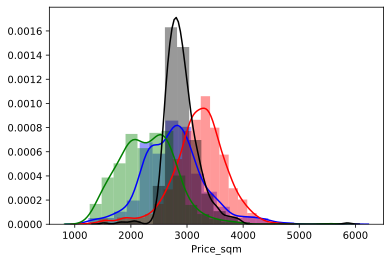

In [135]:
sns.distplot(df['Price_sqm'].loc[df['DistrictId'] == 27], color='b', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df['Price_sqm'].loc[df['DistrictId'] == 1], color='r', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df['Price_sqm'].loc[df['DistrictId'] == 23], color='g', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df['Price_sqm'].loc[df['DistrictId'] == 6], color='k', bins=20, hist_kws={'alpha': 0.4});

**и маленькие

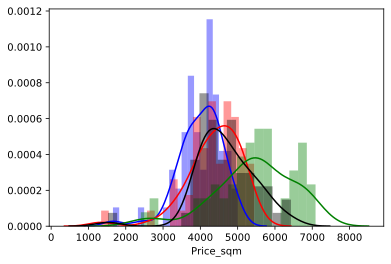

In [136]:
sns.distplot(df['Price_sqm'].loc[df['DistrictId'] == 55], color='b', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df['Price_sqm'].loc[df['DistrictId'] == 10], color='r', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df['Price_sqm'].loc[df['DistrictId'] == 31], color='g', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df['Price_sqm'].loc[df['DistrictId'] == 105], color='k', bins=20, hist_kws={'alpha': 0.4});

**Вывод: распределения по районам похожи на нормальные(хотя и не все). Цены в "больших" районах как-буто бы ниже чем в "маленьких". Возможно, имеет смысл каждому району установить медианную цену за квадрат и использовать ее как признак. С кол-вом предложений в районе поступим также, но позже, когда объединим тестовый и тренировочный датасеты для приведения к общему виду. А пока просто проверим есть ли зависимость между медианной ценой за квадрат и кол-вом предложений в районе

In [140]:
med_price_by_district = df.groupby(['DistrictId'], as_index=False).agg({'Price_sqm':'median', 'Rooms': 'count'})\
                       .rename(columns={'Price_sqm':'MedPriceByDistrict', 'Rooms': 'Quantity'})


In [141]:
med_price_by_district.head()

,DistrictId,MedPriceByDistrict,Quantity
0,0,3935.90641,48
1,1,3251.27441,649
2,2,4550.70925,78
3,3,3898.46506,81
4,4,5716.88835,11


In [142]:
med_price_by_district.corr()

,DistrictId,MedPriceByDistrict,Quantity
DistrictId,1.00000,0.32704,-0.43664
MedPriceByDistrict,0.32704,1.00000,-0.46820
Quantity,-0.43664,-0.46820,1.00000


**Попробуем найти искомые два класса жилья, существование которых мы предположили глядя на двугорбое распределение.

In [166]:
df = df.merge(med_price_by_district, on='DistrictId', how='right')

Методом научного тыка подбираем размер района так, чтобы распределение цены за квадрат стало похожим на нормальное. Забегая вперед скажу, что на тренировочных данных такой размер получился равным  120. На объединенных данных - скорее всего будет 180, т.к. данных в полтора раза больше, а число районов тоже самое

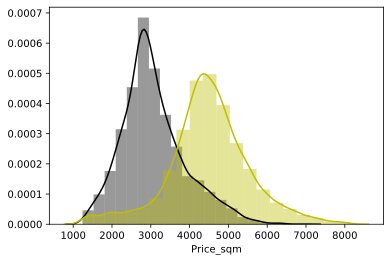

In [188]:
sns.distplot(df['Price_sqm'].loc[df['Quantity'] > 120], color='k', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df['Price_sqm'].loc[df['Quantity'] <= 120], color='y', bins=20, hist_kws={'alpha': 0.4});

## Чистим от выбросов

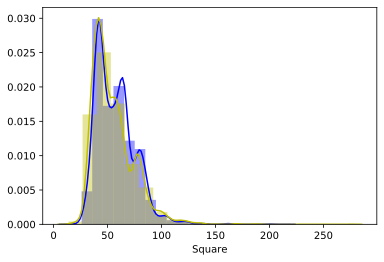

In [201]:
sns.distplot(df['Square'].loc[df['Quantity'] > 120], color='b', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df['Square'].loc[df['Quantity'] <= 120], color='y', bins=20, hist_kws={'alpha': 0.4});


**С площадью кажется все в порядке

## Объединяем датасеты

Т.к. остальные признаки будем чистить на общем датасете. Добавляем признак медианной цены за квадрат по району

In [1268]:
df_total = pd.concat([df, df_test], sort=False)
df_total.shape

(14900, 23)

**Снова проверим площадь и сравним тренировочные данные и данные объединенного датасета

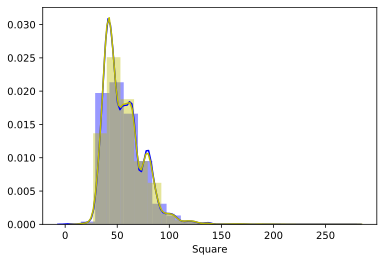

In [1269]:
sns.distplot(df_total['Square'], color='b', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df['Square'], color='y', bins=20, hist_kws={'alpha': 0.4});


**смысла чистить нет, т.к. графики совпадают с тренировочными данными, а там выбросы почищены по стоимости за квадрат. Большие квартиры в этом случае стоить должны адекватно площади

**пересчитаем показатель отношения жилой площади к общей

In [1270]:
df_total['Share_Life_Square'] = df_total['LifeSquare']/df_total['Square']

In [1271]:
df_total['Share_Life_Square'].describe()

count   11754.00000
mean        0.65837
std         0.88409
min         0.00273
25%         0.55718
50%         0.61790
75%         0.69631
max        91.56797
Name: Share_Life_Square, dtype: float64

In [1272]:
df_total.loc[df_total['Share_Life_Square'] > 1, 'Share_Life_Square'] = 0.61


C:\Users\MI\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\MI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\MI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


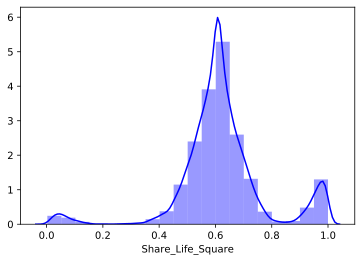

In [1273]:
sns.distplot(df_total['Share_Life_Square'], color='b', bins=20, hist_kws={'alpha': 0.4});


Распределение доли жилой площади. Околонулевые значения непохожи на выбросы,  кучно расположены. Может быть это нежилые помещения, апартаменты, офисы... не будем удалять. Пропуски заполним медианой.

In [1274]:
df_total.loc[df_total['Share_Life_Square'].isnull(), 'Share_Life_Square'] = df_total['Share_Life_Square'].median()

In [1275]:
df_total.shape

(14900, 23)

Теперь чтобы получить жилую площадь домножим площадь на получившийся коэффициент.

In [1276]:
df_total['LifeSquare'] = df_total['Share_Life_Square'] * df_total['Square']

In [1277]:
df_total['LifeSquare'].describe()

count   14900.00000
mean       34.97359
std        15.01729
min         0.33349
25%        23.86741
50%        32.68297
75%        43.44610
max       233.94931
Name: LifeSquare, dtype: float64

## Разберемся с кухней, этажностью, комнатами и годом постройки

In [1278]:
df_total.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,14900.00000,50.51886,43.59635,0.00000,20.00000,37.00000,75.00000,212.00000
Rooms,14900.00000,1.89510,0.83897,0.00000,1.00000,2.00000,2.00000,19.00000
Square,14900.00000,56.20316,18.91651,1.37854,41.80556,52.57518,65.98039,275.64528
LifeSquare,14900.00000,34.97359,15.01729,0.33349,23.86741,32.68297,43.44610,233.94931
KitchenSquare,14900.00000,6.16852,24.09118,0.00000,1.00000,6.00000,9.00000,2014.00000
Floor,14900.00000,8.56456,5.31905,1.00000,4.00000,7.00000,12.00000,78.00000
HouseFloor,14900.00000,12.60966,6.77440,0.00000,9.00000,12.00000,17.00000,117.00000
HouseYear,14900.00000,3330.52805,164256.21683,1908.00000,1974.00000,1977.00000,2001.00000,20052011.00000
Ecology_1,14900.00000,0.11940,0.11944,0.00000,0.01765,0.07542,0.19578,0.52187
Social_1,14900.00000,24.77322,17.54291,0.00000,6.00000,25.00000,36.00000,74.00000


### Floor

In [1279]:
df_total['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 37, 38,
       42, 46, 78], dtype=int64)

здесь все ОК

### HouseFloor

Этаж квартиры выше чем этажность дома - чистим. Пытаюсь думать как человек разместивший объявление о продаже. Свой этаж он точно знать должен, а вот с этажностью дома мог и ошибиться 

In [1280]:
df_total.loc[df_total['HouseFloor'] < df_total['Floor'], 'HouseFloor'] = df_total['HouseFloor'].median()
df_total.loc[df_total['HouseFloor'] < df_total['Floor'], 'HouseFloor'] = df_total.loc[df_total['HouseFloor'] < df_total['Floor'], 'Floor'] + 1

In [1281]:
df_total.shape

(14900, 23)

In [1282]:
df_total['HouseFloor'].sort_values().unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  79.,
        99., 117.])

### KitchenSquare
достаточно забить в AirBnb поиск апартаментов целиком в каком-нибудь Нью-Йорке, чтобы убедиться, что они бывают без кухни или чисто номинальной кухней где-нибудь в коридоре. Также находил статью на Guardian, что квартиры без кухни - это тренд.


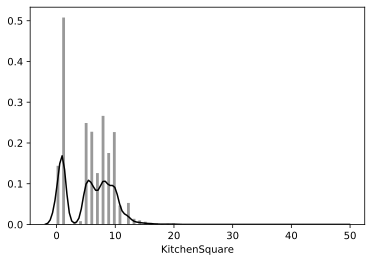

In [1283]:
sns.distplot(df_total['KitchenSquare'].loc[df_total['KitchenSquare'] < 50], color='k', bins=100, hist_kws={'alpha': 0.4});


In [1284]:
df_total.loc[df_total['KitchenSquare'] > 17, 'KitchenSquare'] = df_total['KitchenSquare'].median()

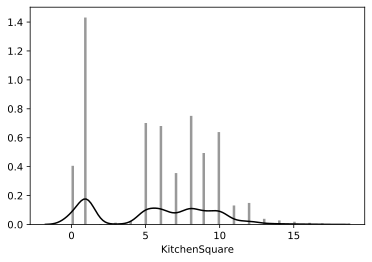

In [1285]:
sns.distplot(df_total['KitchenSquare'], color='k', bins=100, hist_kws={'alpha': 0.4});


In [1286]:
df_total['KitchenSquare'].describe()

count   14900.00000
mean        5.64557
std         3.78993
min         0.00000
25%         1.00000
50%         6.00000
75%         9.00000
max        17.00000
Name: KitchenSquare, dtype: float64

### HouseYear

In [1287]:
df_total['HouseYear'].sort_values().unique()

array([    1908,     1909,     1910,     1911,     1912,     1914,
           1916,     1917,     1918,     1919,     1920,     1926,
           1927,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1943,     1947,
           1948,     1949,     1950,     1951,     1952,     1953,
           1954,     1955,     1956,     1957,     1958,     1959,
           1960,     1961,     1962,     1963,     1964,     1965,
           1966,     1967,     1968,     1969,     1970,     1971,
           1972,     1973,     1974,     1975,     1976,     1977,
           1978,     1979,     1980,     1981,     1982,     1983,
           1984,     1985,     1986,     1987,     1988,     1989,
           1990,     1991,     1992,     1993,     1994,     1995,
           1996,     1997,     1998,     1999,     2000,     2001,
           2002,     2003,     2004,     2005,     2006,     2

In [1288]:
df_total.loc[df_total['HouseYear'] == 20052011, 'HouseYear'] = 2011

In [1289]:
df_total.loc[df_total['HouseYear'] > 2020, 'HouseYear'] = 2020

In [1290]:
df_total.shape

(14900, 23)

## Категориальные признаки и Dummies

In [1291]:
df_total['DistrictId'] = df_total['DistrictId'].astype(str)

In [1292]:
df_total.describe(include=['O']).T

,count,unique,top,freq
DistrictId,14900,212,27,1235
Ecology_2,14900,2,B,14755
Ecology_3,14900,2,B,14477
Shops_2,14900,2,B,13666


In [1293]:
df_total['Ecology_2_bin'] = df_total['Ecology_2'].replace({'A':0, 'B':1})
df_total['Ecology_3_bin'] = df_total['Ecology_3'].replace({'A':0, 'B':1})
df_total['Shops_2_bin'] = df_total['Shops_2'].replace({'A':0, 'B':1})

In [1294]:
df_total['Shops_2_bin'].describe()

count   14900.00000
mean        0.91718
std         0.27562
min         0.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         1.00000
Name: Shops_2_bin, dtype: float64

**дропнем оригинальные столбцы, а заодно и Healthcare_1, в котором не хватает много данных, а также вспомогательные столбцы, которые мы исользовали на тренировочных данных**

In [1295]:
df_total = df_total.drop(['Ecology_2', 'Ecology_3', 'Shops_2', 'Healthcare_1', 'Share_Life_Square'], axis=1)

In [1296]:
df_total

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Price_sqm,MedPriceByDistrict,Quantity,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,35,2.00000,47.98156,29.44275,6.00000,7,9.00000,1969,0.08904,33,7976,5,0,11,184966.93073,3854.95857,4358.27485,22.00000,1,1,1
1,35,3.00000,63.85140,47.24574,6.00000,7,9.00000,1971,0.08904,33,7976,5,0,11,242403.71588,3796.37260,4358.27485,22.00000,1,1,1
2,35,1.00000,47.41077,28.92057,0.00000,4,12.00000,1977,0.08904,33,7976,5,0,11,218138.09596,4601.02367,4358.27485,22.00000,1,1,1
3,35,2.00000,43.32582,22.48788,6.00000,7,14.00000,1969,0.08904,33,7976,5,0,11,194175.39511,4481.74806,4358.27485,22.00000,1,1,1
4,35,1.00000,46.28719,28.23519,1.00000,13,14.00000,2015,0.08904,33,7976,5,0,11,195895.98322,4232.18526,4358.27485,22.00000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,11,3.00000,67.13391,50.80980,6.00000,5,9.00000,1973,0.00017,36,5992,0,1,1,nan,nan,nan,nan,1,1,1
4695,1,1.00000,40.19847,21.80706,10.00000,12,17.00000,2017,0.00712,1,264,0,0,1,nan,nan,nan,nan,1,1,1
5783,12,3.00000,77.84218,48.28263,9.00000,23,24.00000,1989,0.09080,74,19083,2,5,15,nan,nan,nan,nan,1,1,1
4780,62,2.00000,81.30522,49.59619,0.00000,4,12.00000,1977,0.07216,2,629,1,0,0,nan,nan,nan,nan,1,1,0


In [1297]:
df_total = df_total.drop(['MedPriceByDistrict', 'Quantity'], axis=1)

In [1298]:
df_total.shape

(14900, 19)

In [1299]:
df_total.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Price_sqm,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,35,2.00000,47.98156,29.44275,6.00000,7,9.00000,1969,0.08904,33,7976,5,0,11,184966.93073,3854.95857,1,1,1
1,35,3.00000,63.85140,47.24574,6.00000,7,9.00000,1971,0.08904,33,7976,5,0,11,242403.71588,3796.37260,1,1,1
2,35,1.00000,47.41077,28.92057,0.00000,4,12.00000,1977,0.08904,33,7976,5,0,11,218138.09596,4601.02367,1,1,1
3,35,2.00000,43.32582,22.48788,6.00000,7,14.00000,1969,0.08904,33,7976,5,0,11,194175.39511,4481.74806,1,1,1
4,35,1.00000,46.28719,28.23519,1.00000,13,14.00000,2015,0.08904,33,7976,5,0,11,195895.98322,4232.18526,1,1,1


## Новые признаки
**1: медианная цена за квадрат в районе
**2: категориальная переменная по размеру района

In [1300]:
med_price_by_district['DistrictId'] = med_price_by_district['DistrictId'].astype(str)

In [1301]:
df_total = df_total.reset_index().merge(med_price_by_district, on='DistrictId', how='left')

In [1302]:
df_total

,index,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Price_sqm,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict,Quantity
0,0,35,2.00000,47.98156,29.44275,6.00000,7,9.00000,1969,0.08904,33,7976,5,0,11,184966.93073,3854.95857,1,1,1,4358.27485,22.00000
1,1,35,3.00000,63.85140,47.24574,6.00000,7,9.00000,1971,0.08904,33,7976,5,0,11,242403.71588,3796.37260,1,1,1,4358.27485,22.00000
2,2,35,1.00000,47.41077,28.92057,0.00000,4,12.00000,1977,0.08904,33,7976,5,0,11,218138.09596,4601.02367,1,1,1,4358.27485,22.00000
3,3,35,2.00000,43.32582,22.48788,6.00000,7,14.00000,1969,0.08904,33,7976,5,0,11,194175.39511,4481.74806,1,1,1,4358.27485,22.00000
4,4,35,1.00000,46.28719,28.23519,1.00000,13,14.00000,2015,0.08904,33,7976,5,0,11,195895.98322,4232.18526,1,1,1,4358.27485,22.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,8180,11,3.00000,67.13391,50.80980,6.00000,5,9.00000,1973,0.00017,36,5992,0,1,1,nan,nan,1,1,1,4134.35375,129.00000
14896,4695,1,1.00000,40.19847,21.80706,10.00000,12,17.00000,2017,0.00712,1,264,0,0,1,nan,nan,1,1,1,3251.27441,649.00000
14897,5783,12,3.00000,77.84218,48.28263,9.00000,23,24.00000,1989,0.09080,74,19083,2,5,15,nan,nan,1,1,1,4183.68641,63.00000
14898,4780,62,2.00000,81.30522,49.59619,0.00000,4,12.00000,1977,0.07216,2,629,1,0,0,nan,nan,1,1,0,2611.02222,246.00000


In [1303]:
df_total = df_total.drop(['Quantity'], axis=1)

In [1304]:
df_total.shape

(14900, 21)

**посчитаем размер района и добавим как признак**

In [1306]:
district_size = pd.DataFrame(df_total['DistrictId'].value_counts())
district_size.reset_index(inplace=True)
district_size.columns = ['DistrictId', 'Size']
district_size.head()


,DistrictId,Size
0,27,1235
1,1,993
2,23,823
3,6,767
4,9,423


In [1307]:
df_total = df_total.reset_index().merge(district_size, on='DistrictId', how='right')

In [1308]:
df_total

,level_0,index,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Price_sqm,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict,Size
0,0,0,35,2.00000,47.98156,29.44275,6.00000,7,9.00000,1969,0.08904,33,7976,5,0,11,184966.93073,3854.95857,1,1,1,4358.27485,36
1,1,1,35,3.00000,63.85140,47.24574,6.00000,7,9.00000,1971,0.08904,33,7976,5,0,11,242403.71588,3796.37260,1,1,1,4358.27485,36
2,2,2,35,1.00000,47.41077,28.92057,0.00000,4,12.00000,1977,0.08904,33,7976,5,0,11,218138.09596,4601.02367,1,1,1,4358.27485,36
3,3,3,35,2.00000,43.32582,22.48788,6.00000,7,14.00000,1969,0.08904,33,7976,5,0,11,194175.39511,4481.74806,1,1,1,4358.27485,36
4,4,4,35,1.00000,46.28719,28.23519,1.00000,13,14.00000,2015,0.08904,33,7976,5,0,11,195895.98322,4232.18526,1,1,1,4358.27485,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,13176,2262,181,2.00000,49.82489,27.98343,7.00000,3,10.00000,1967,0.00000,8,1423,37,1,8,nan,nan,1,1,1,nan,2
14896,12223,9155,204,3.00000,88.55934,62.85422,8.00000,8,12.00000,1918,0.03732,32,6748,93,4,10,nan,nan,1,1,1,nan,1
14897,12270,8845,203,2.00000,50.41771,27.58797,7.00000,5,12.00000,1977,0.01502,17,3079,59,0,8,nan,nan,1,1,1,nan,1
14898,12566,15655,211,2.00000,46.50156,32.27699,5.00000,5,5.00000,1965,0.00000,16,3681,73,2,5,nan,nan,1,1,1,nan,1


**Проверим гипотезу о размере района и распределении цены методом научного тыка.**

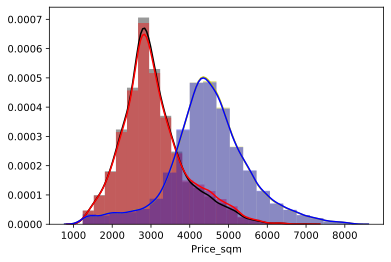

In [1309]:
sns.distplot(df_total['Price_sqm'].loc[df_total['Size'] > 200], color='k', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df_total['Price_sqm'].loc[df_total['Size'] <= 200], color='y', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df_total['Price_sqm'].loc[df_total['Size'] > 180], color='r', bins=20, hist_kws={'alpha': 0.4});
sns.distplot(df_total['Price_sqm'].loc[df_total['Size'] <= 180], color='b', bins=20, hist_kws={'alpha': 0.4});

**считаем 200 оптимальной величиной и добавляем соответствующий признак**

In [1310]:
(df_total['Size'] > 200).value_counts()

False    8767
True     6133
Name: Size, dtype: int64

In [1311]:
df_total['IsDistrictLarge'] = (df_total['Size'] > 200).astype(int)

In [1312]:
df_total.describe().T

,count,mean,std,min,25%,50%,75%,max
level_0,14900.00000,7449.50000,4301.40384,0.00000,3724.75000,7449.50000,11174.25000,14899.00000
index,14900.00000,6111.61255,3992.16632,0.00000,2889.75000,5746.50000,8605.25000,16795.00000
Rooms,14900.00000,1.89510,0.83897,0.00000,1.00000,2.00000,2.00000,19.00000
Square,14900.00000,56.20316,18.91651,1.37854,41.80556,52.57518,65.98039,275.64528
LifeSquare,14900.00000,34.97359,15.01729,0.33349,23.86741,32.68297,43.44610,233.94931
KitchenSquare,14900.00000,5.64557,3.78993,0.00000,1.00000,6.00000,9.00000,17.00000
Floor,14900.00000,8.56456,5.31905,1.00000,4.00000,7.00000,12.00000,78.00000
HouseFloor,14900.00000,14.05691,5.69987,1.00000,10.00000,14.00000,17.00000,117.00000
HouseYear,14900.00000,1984.69262,18.41800,1908.00000,1974.00000,1977.00000,2001.00000,2020.00000
Ecology_1,14900.00000,0.11940,0.11944,0.00000,0.01765,0.07542,0.19578,0.52187


**У нас образовались пропуски в MedPriceByDistrict. Поправим**

In [1313]:
df_total.loc[df_total['MedPriceByDistrict'].isnull(), 
             'MedPriceByDistrict'] = df_total.loc[df_total['IsDistrictLarge'] == 0, 'MedPriceByDistrict'].median()

In [1405]:
df_total['MedPriceByDistrict'].describe()

count   14900.00000
mean     3923.24323
std       961.77814
min      2281.16323
25%      2938.04824
50%      4141.03534
75%      4564.04451
max      8005.60505
Name: MedPriceByDistrict, dtype: float64

## Сделаем еще один новый признак

домножим среднюю стоимость квадрата в районе на площадь квартиры и добавим признак квартиры находяйщеся на первом этаже.

In [1315]:
df_total['Mean_flat_price'] = df_total['MedPriceByDistrict'] * df_total['Square']


In [1316]:
df_total['Is_First_Floor'] = 0

In [1317]:
df_total.loc[df_total['Floor'] == 1, 'Is_First_Floor'] = 1
df_total['Is_First_Floor'].describe()

count   14900.00000
mean        0.02268
std         0.14890
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: Is_First_Floor, dtype: float64

## Разбиваем на тестовый и тренировочный датасеты.

In [1318]:
df_train = df_total.loc[df_total['Price'].notnull()]
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
level_0,9900.00000,4949.50000,2858.02817,0.00000,2474.75000,4949.50000,7424.25000,9899.00000
index,9900.00000,4949.50000,2858.02817,0.00000,2474.75000,4949.50000,7424.25000,9899.00000
Rooms,9900.00000,1.88758,0.83911,0.00000,1.00000,2.00000,2.00000,19.00000
Square,9900.00000,56.07874,18.82660,13.78486,41.76066,52.43407,65.84417,275.64528
LifeSquare,9900.00000,34.93533,15.13605,0.37062,23.82361,32.54439,43.40856,233.94931
KitchenSquare,9900.00000,5.63020,3.79837,0.00000,1.00000,6.00000,9.00000,17.00000
Floor,9900.00000,8.53051,5.23413,1.00000,4.00000,7.00000,12.00000,42.00000
HouseFloor,9900.00000,14.07879,5.63338,1.00000,11.00000,14.00000,17.00000,117.00000
HouseYear,9900.00000,1984.84414,18.33822,1910.00000,1974.00000,1977.00000,2001.00000,2020.00000
Ecology_1,9900.00000,0.11916,0.11913,0.00000,0.01765,0.07542,0.19578,0.52187


In [1319]:
df_tests = df_total.loc[df_total['Price'].isnull()]
df_tests['index'].describe()

count    5000.00000
mean     8412.59540
std      4832.67404
min         1.00000
25%      4221.75000
50%      8320.50000
75%     12598.25000
max     16795.00000
Name: index, dtype: float64

## Отбор признаков

In [1320]:
df_train.columns.tolist()

['level_0',
 'index',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'Price_sqm',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'MedPriceByDistrict',
 'Size',
 'IsDistrictLarge',
 'Mean_flat_price',
 'Is_First_Floor']

In [1325]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2_bin']
new_features = ['IsDistrictLarge', 'Mean_flat_price', 'MedPriceByDistrict', 'Size', 'Is_First_Floor']

target_name = 'Price'


## Построение модели на основе случайного леса

In [1390]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV


In [1391]:
X = df_train[feature_names + new_features]
y = df_train[target_name]

In [1392]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=21)

In [1393]:
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)


In [1397]:
rf_model = RandomForestRegressor(random_state=21, max_depth=17, n_estimators=1500, n_jobs=-1,  max_features=4)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1500,
                      n_jobs=-1, oob_score=False, random_state=21, verbose=0,
                      warm_start=False)

## Визуализируем результаты

Train R2:	0.965
Valid R2:	0.776


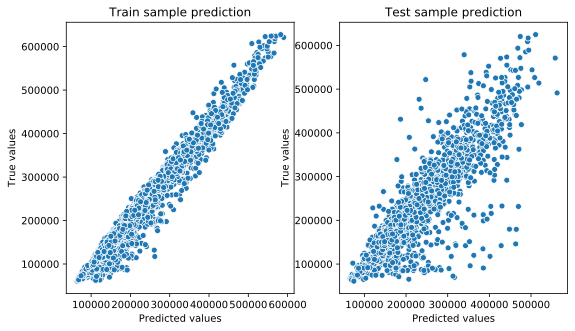

In [1398]:
y_train_preds = rf_model.predict(X_train_scaled)
y_test_preds = rf_model.predict(X_val_scaled)

evaluate_preds(y_train, y_train_preds, y_val, y_test_preds)

## Кросс-валидация

In [1399]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=21))
cv_score

array([0.77593533, 0.78070956, 0.79593582, 0.80020649, 0.78694497])

In [1400]:
cv_score.mean()

0.787946434788992

## Важность признаков

In [1353]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
17,Mean_flat_price,0.30593
1,Square,0.15382
18,MedPriceByDistrict,0.09034
2,LifeSquare,0.08697
0,Rooms,0.08240
19,Size,0.04964
11,Social_2,0.03273
10,Social_1,0.02851
3,KitchenSquare,0.02563
16,IsDistrictLarge,0.02558


##  Предсказываем результаты для тестовой выборки

In [1401]:
X_submit = df_tests[feature_names + new_features]
X_submit_scaled = pd.DataFrame(scaler.transform(X_submit), columns=X_submit.columns)
y_submit_preds = rf_model.predict(X_submit_scaled)
y_submit_preds.shape

(5000,)

## Создаем датафрейм для выгрузки

In [1402]:
sz = pd.DataFrame(df_tests['index'])
sz = sz.reset_index(drop=True)
sz.head()

submission = pd.concat([sz, pd.DataFrame(y_submit_preds)], axis=1)
submission.columns = ['Id', 'Price']
submission

,Id,Price
0,4247,173383.93454
1,15023,254052.53041
2,4974,199987.91514
3,4023,254377.87403
4,6427,158943.05454
...,...,...
4995,2262,194426.13323
4996,9155,387976.90843
4997,8845,220639.11026
4998,15655,195493.09049


## Выгружаем в файл

In [1404]:
submission.to_csv('fadin_aleksandr_predictions.csv',sep=",", index=False)
